In [1]:
import os
import sys
sys.path.append("../src/")
import argparse
import pandas as pd

from sklearn.metrics import mean_absolute_error

from utils import *
from preprocess import PreProcessor
# from model import Model, OptunaProcessor

categorical_feature = ['ARI_CO', 'ARI_PO', 'SHIP_TYPE_CATEGORY', 'ID', 'SHIPMANAGER', 'FLAG']

# def train(args):
## load data set
X_train, y_train, X_valid, y_valid = load_dataset(mode='train')

## preprocess data set
preprocessing = PreProcessor(categorical_feature=categorical_feature)
encoder_dict = preprocessing.categorical_process_fit(X_train)

# save_pickle(file=encoder_dict, file_name="labelencoder", path=f"{args.pickle_path}{args.version}encoder")

X_train = preprocessing.run(X_train, encoder=encoder_dict, drop=True)
X_valid = preprocessing.run(X_valid, encoder=encoder_dict, drop=True)

X_train, y_train = reset_data(X_train, y_train)
X_valid, y_valid = reset_data(X_valid, y_valid)

#     ## progress optuna
#     if args.mode == 'optuna':
#         print("     Strat Optuna!")
#         optuna = OptunaProcessor(X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, categorical_feature=categorical_feature)
#         optuna_process = optuna.run_optuna(n_trials=args.n_trials, model_name=args.model_name)
#         best_optuna_params = optuna_process.params
#         print("     Done Optuna!")
        
#         save_pickle(file=best_optuna_params, file_name=f"{args.model_name}_optuna", path=f"{args.pickle_path}/{args.version}")

#     else: 
#         best_optuna_params = load_pickle(file_name=f"{args.model_name}_optuna", path=f"{args.pickle_path}/{args.version}")

#     ## train model
#     model = Model(
#         model_params=best_optuna_params, 
#         categorical_feature=categorical_feature, 
#         X_train=X_train, 
#         y_train=y_train,
#         X_valid=X_valid,
#         y_valid=y_valid,
#         model_name=args.model_name
#         )
#     model = model.fit()
    
#     save_pickle(file=model, file_name=args.model_name, path=f"{args.pickle_path}/{args.version}")

#     mae = mean_absolute_error(model.predict(X_valid), y_valid)
#     print("Model Name : ", args.model_name)
#     print("Validatio MAE : ", mae)

# if __name__ == "__main__":
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--pickle_path", "-pp", type=int, default="../pickle", help="path of pickle folder")
#     parser.add_argument("--version", "-v", type=str, default="test_version", help="version number")
#     parser.add_argument("--mode", "-m", type=str, default="", help="progress optuna")
#     parser.add_argument("--n_trials", "-n", type=int, default=2, help="set number of trials")
#     parser.add_argument("--model_name", "-mn", type=str, default="lgboost", help="select model")
#     args = parser.parse_args()
#     train(args)

In [3]:
X_train.dtypes

ARI_CO                category
ARI_PO                category
SHIP_TYPE_CATEGORY    category
DIST                   float64
ID                    category
BREADTH                float64
BUILT                    int64
DEADWEIGHT               int64
DEPTH                  float64
DRAUGHT                float64
GT                       int64
LENGTH                 float64
SHIPMANAGER           category
FLAG                  category
ATA_LT                   int64
DUBAI                  float64
BRENT                  float64
WTI                    float64
BDI_ADJ                float64
PORT_SIZE              float64
year                     int64
month                    int64
day                      int64
hour                     int64
minute                   int64
weekday                  int64
dtype: object

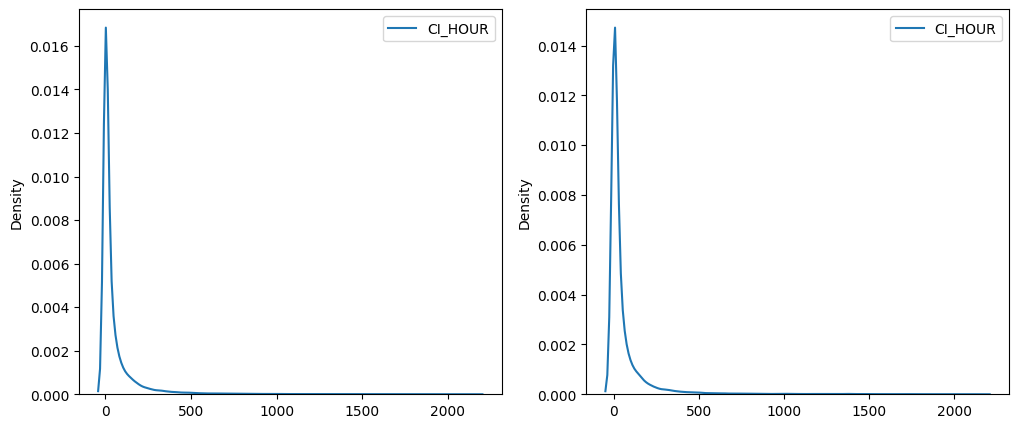

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(y_train)
# sns.boxplot(y_train)
plt.subplot(1,2,2)
sns.kdeplot(y_valid)
# sns.boxplot(y_valid)
plt.show()

<AxesSubplot:ylabel='Density'>

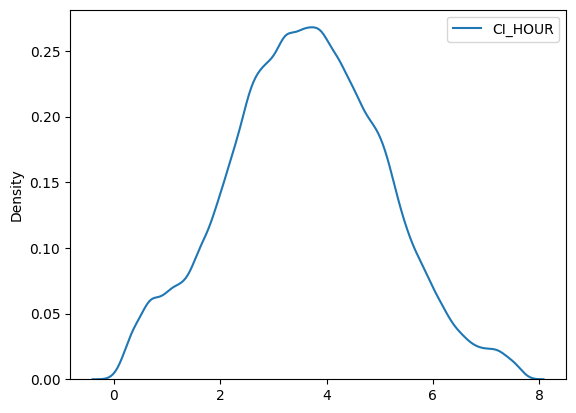

In [45]:
sns.kdeplot(np.log1p(y_train.loc[y_train.CI_HOUR != 0]))

category: 'BREADTH', 'DEPTH', 'DRAUGHT', 
numeric: 

In [70]:
X_train['BREADTH'].unique()

array([30., 40., 20., 50., 60., 10.])

In [4]:
X_train.describe()

,DIST,BREADTH,BUILT,DEADWEIGHT,DEPTH,DRAUGHT,GT,LENGTH,ATA_LT,DUBAI,BRENT,WTI,BDI_ADJ,PORT_SIZE,year,month,day,hour,minute,weekday
count,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.000000,257208.00000,257208.000000,257208.000000
mean,19.325051,30.538514,14.750202,63467.728103,16.470794,11.080526,41278.833318,205.016485,11.836409,65.523566,67.546654,63.195439,1347.352661,0.000877,2019.083477,6.441833,15.741202,10.97053,31.057265,2.399731
std,30.950357,10.947328,7.045955,63476.306252,6.039509,4.592556,39277.780816,75.800910,6.642831,20.913645,20.987840,20.636363,738.355790,0.000838,2.414138,3.454390,8.760229,7.01554,18.264817,1.819141
min,0.000000,10.000000,0.000000,100.000000,0.000000,0.000000,150.000000,20.000000,0.000000,13.520000,19.330000,-37.630000,286.802297,0.000005,2014.000000,1.000000,1.000000,0.00000,0.000000,0.000000
25%,0.000000,20.000000,10.000000,14300.000000,10.000000,10.000000,10000.000000,150.000000,7.000000,50.020000,51.460000,48.360000,836.349201,0.000142,2017.000000,3.000000,8.000000,5.00000,15.000000,1.000000
50%,6.891830,30.000000,13.000000,47300.000000,20.000000,10.000000,30500.000000,190.000000,12.000000,62.930000,64.570000,59.090000,1187.238225,0.000552,2019.000000,6.000000,16.000000,10.00000,32.000000,2.000000
75%,25.700883,40.000000,18.000000,81400.000000,20.000000,10.000000,51900.000000,260.000000,17.000000,76.880000,79.300000,74.250000,1658.627314,0.001614,2021.000000,9.000000,23.000000,17.00000,48.000000,4.000000
max,199.922390,60.000000,80.000000,404000.000000,30.000000,20.000000,237000.000000,400.000000,23.000000,127.860000,127.980000,123.700000,4795.865609,0.002615,2023.000000,12.000000,31.000000,23.00000,59.000000,6.000000


In [52]:
len(X_train.columns[X_train.dtypes != 'category'])

20

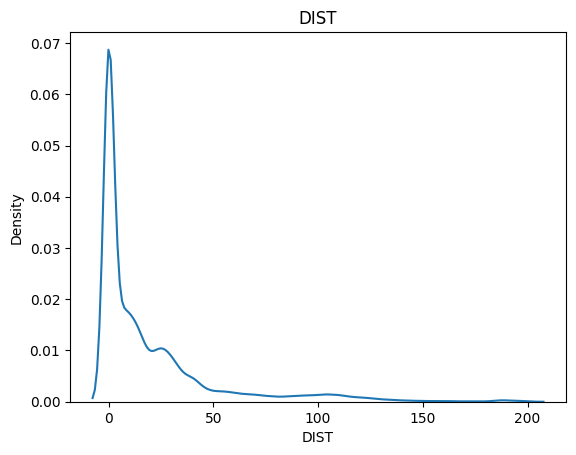

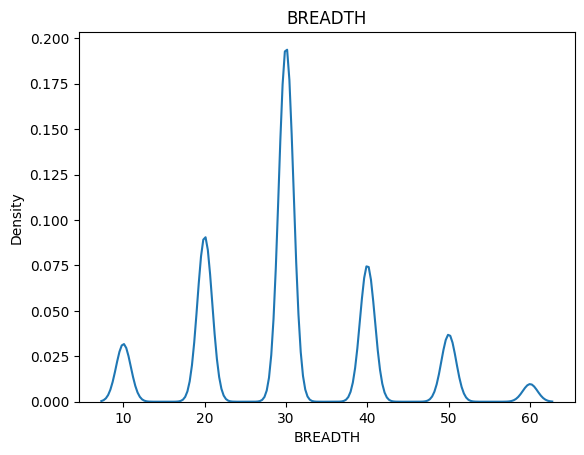

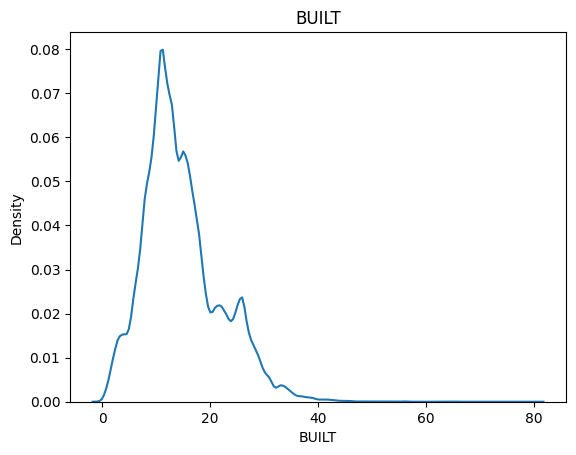

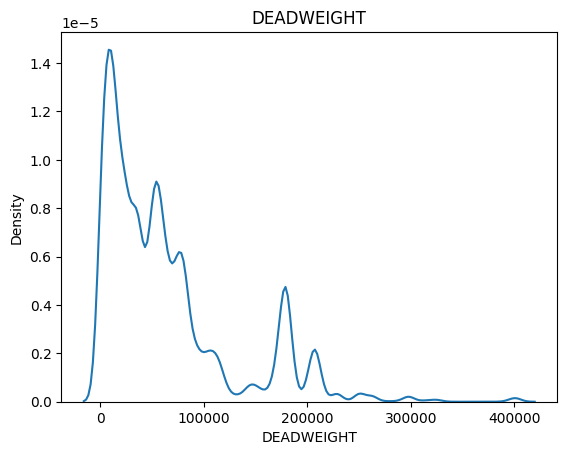

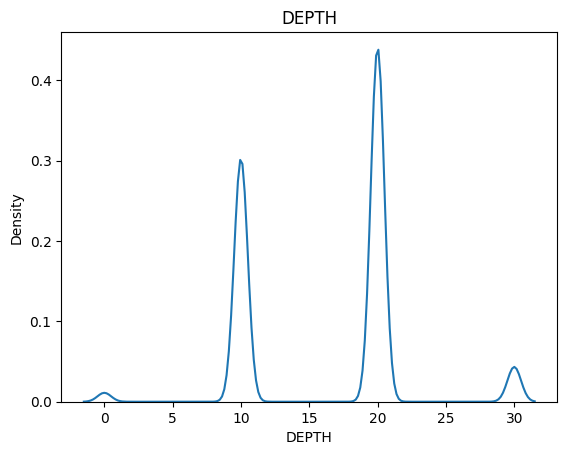

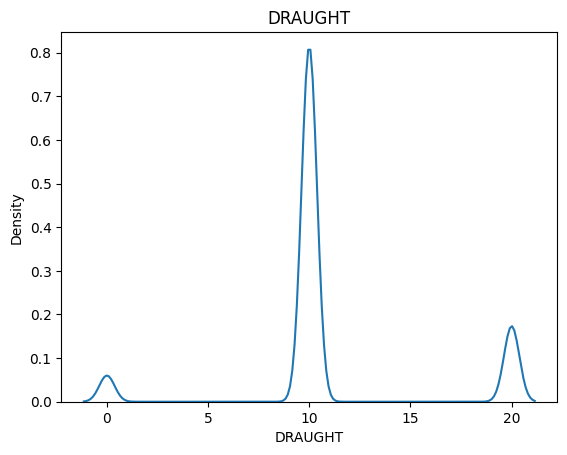

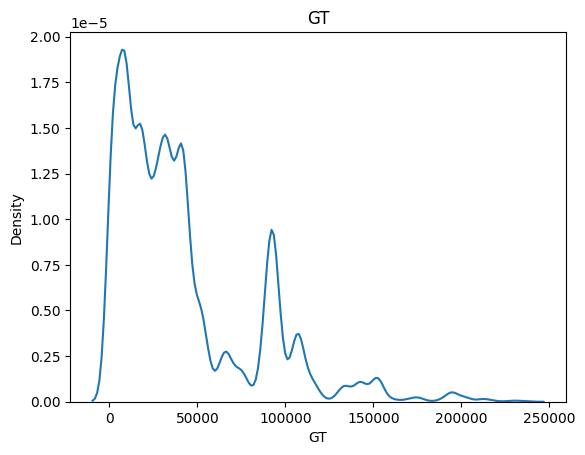

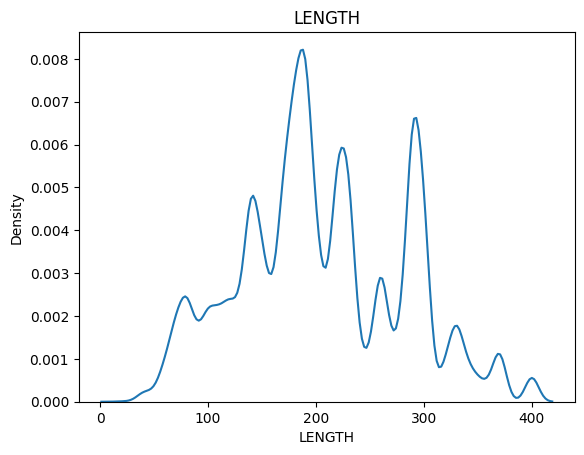

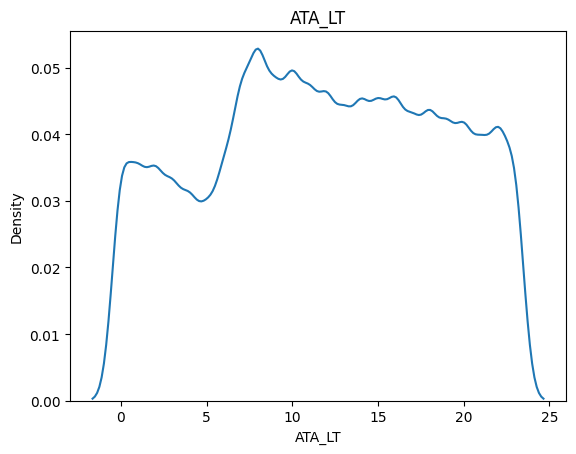

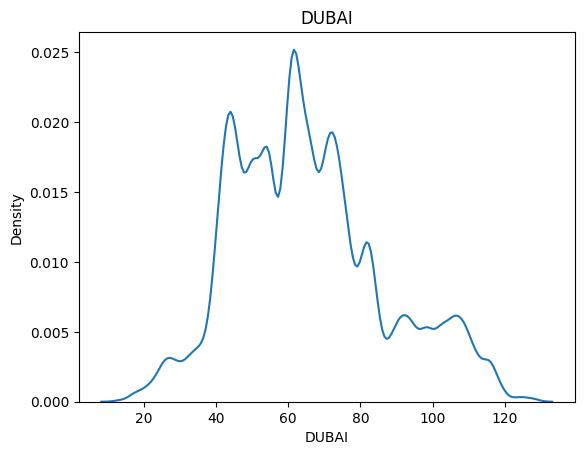

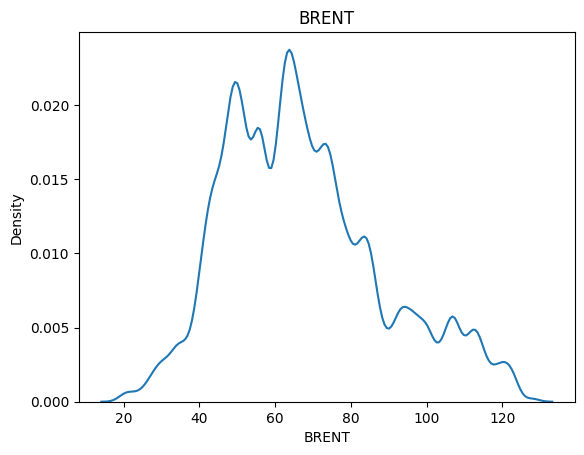

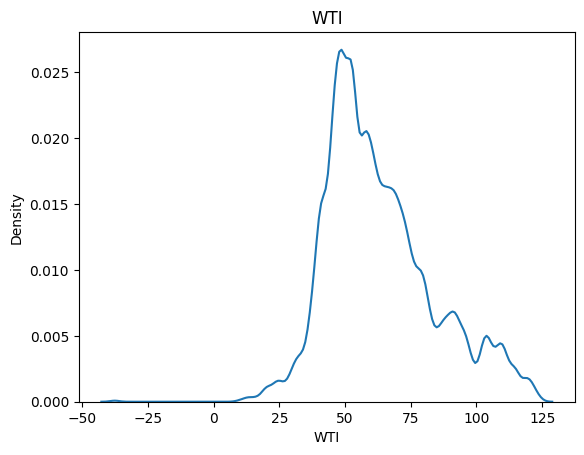

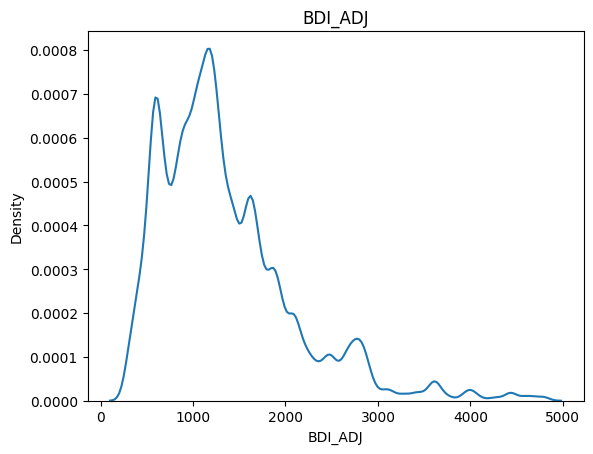

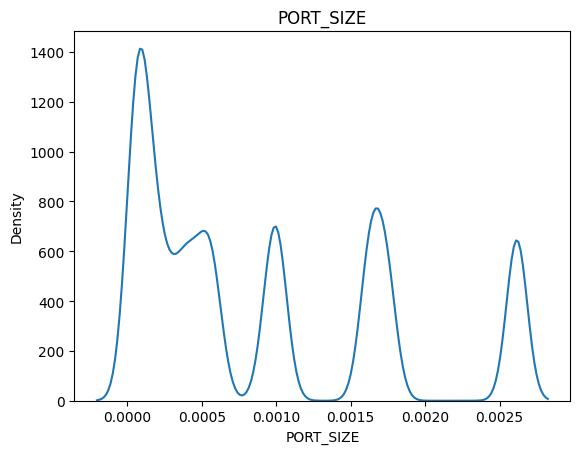

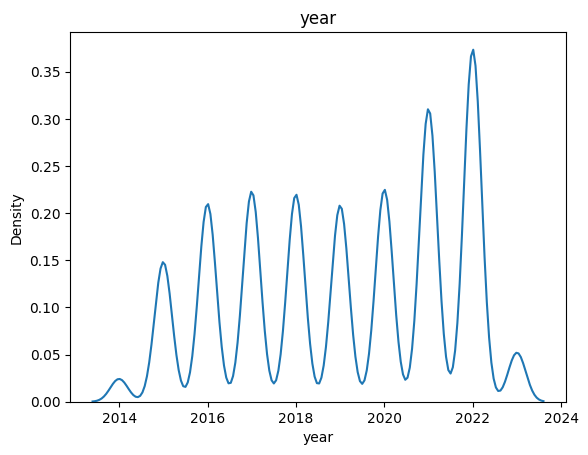

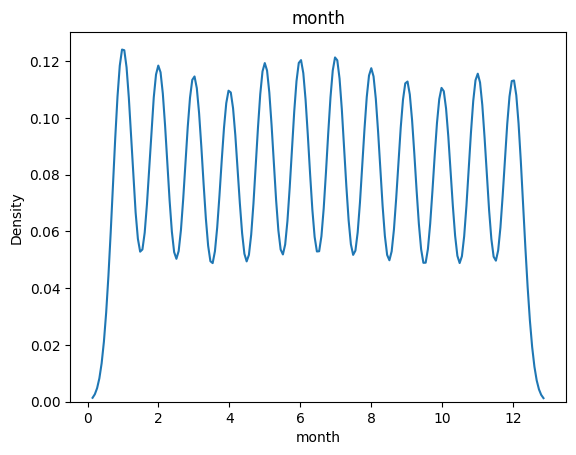

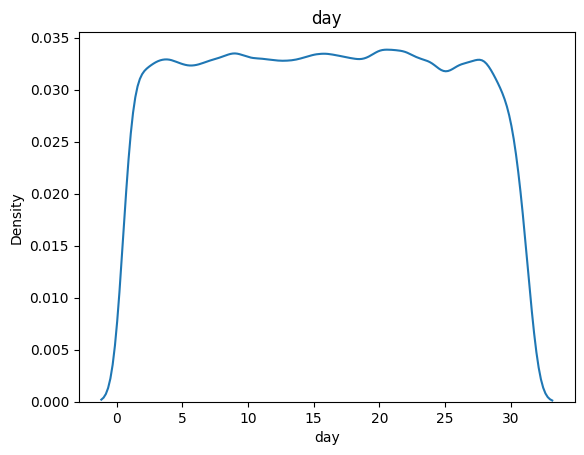

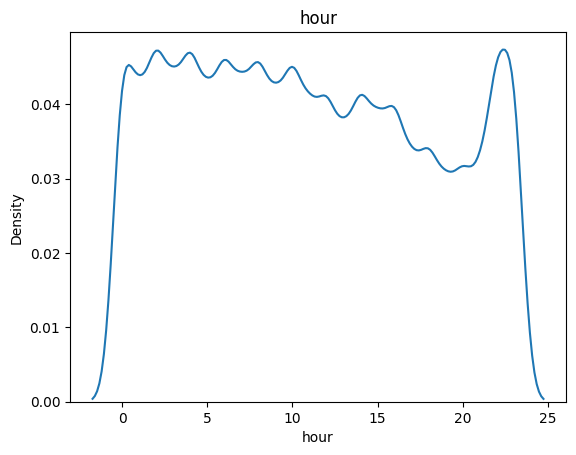

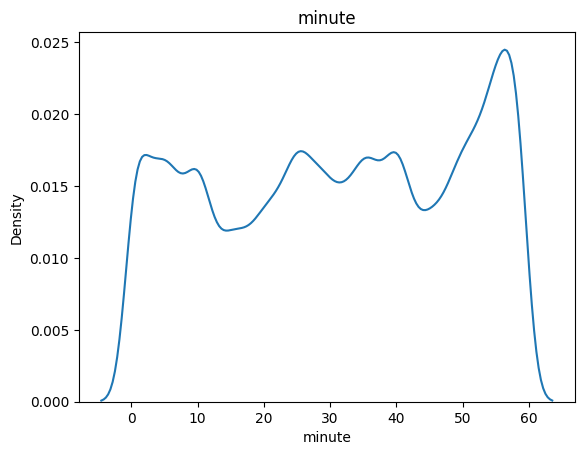

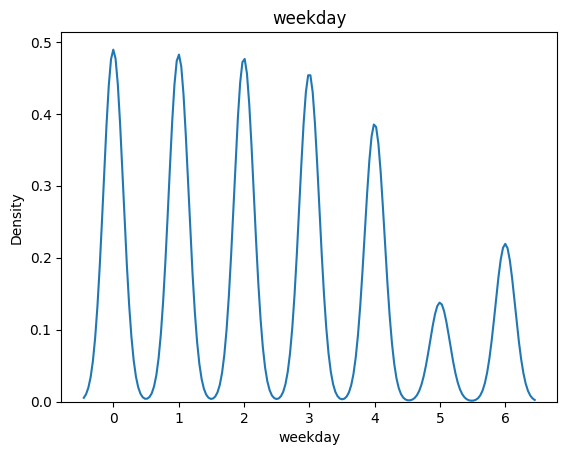

In [64]:
for col in X_train.columns[X_train.dtypes != 'category']:
    sns.kdeplot(X_train[col])
    plt.title(col)
    plt.show()